In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")


In [200]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
Child_mortality = pd.read_csv("Infant and Neonatal Mortality.csv", na_values = missing_value_formats,  dtype={'VALUE': float})

In [201]:
Child_mortality.head()

,Statistic Label,Year,Age Range,Principal Cause of Death,Area,UNIT,VALUE
0,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,Number,NaN
1,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,Number,5.0
2,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,Number,NaN
3,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,Number,1.0
4,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,Number,NaN


# Exploratory Data Analysis

In [202]:
Child_mortality.shape

(67392, 7)

In [203]:
Child_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67392 entries, 0 to 67391
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Statistic Label           67392 non-null  object 
 1   Year                      67392 non-null  int64  
 2   Age Range                 67392 non-null  object 
 3   Principal Cause of Death  67392 non-null  object 
 4   Area                      67392 non-null  object 
 5   UNIT                      67392 non-null  object 
 6   VALUE                     16022 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.6+ MB


In [204]:
Child_mortality.describe()

,Year,VALUE
count,67392.000000,16022.000000
mean,1999.000000,2.461748
std,11.254712,4.580705
min,1980.000000,0.050000
25%,1989.000000,1.000000
50%,1999.000000,1.200000
75%,2009.000000,2.667500
max,2018.000000,99.000000


In [205]:
Child_mortality.nunique()

Statistic Label               2
Year                         39
Age Range                     4
Principal Cause of Death      8
Area                         27
UNIT                          2
VALUE                       635
dtype: int64

In [206]:
Child_mortality.dtypes 

Statistic Label              object
Year                          int64
Age Range                    object
Principal Cause of Death     object
Area                         object
UNIT                         object
VALUE                       float64
dtype: object

In [207]:
Child_mortality.isnull().sum()

Statistic Label                 0
Year                            0
Age Range                       0
Principal Cause of Death        0
Area                            0
UNIT                            0
VALUE                       51370
dtype: int64

In [208]:
# Rows containing duplicate data
duplicate_rows_df = Child_mortality[Child_mortality.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)


number of duplicate rows: (0, 7)


In [209]:
Child_mortality.count() 


Statistic Label             67392
Year                        67392
Age Range                   67392
Principal Cause of Death    67392
Area                        67392
UNIT                        67392
VALUE                       16022
dtype: int64

In [210]:
Number = Child_mortality.loc[Child_mortality['UNIT']=='Number']
rate = Child_mortality.loc[Child_mortality['UNIT']=='Rate' ] 

In [211]:
Number.shape

(33696, 7)

In [212]:
rate.shape

(33696, 7)

In [213]:
Mortality_rate = pd.merge(Number, rate, on=["Year","Age Range","Principal Cause of Death", "Area", ])
Mortality_rate.shape

(33696, 10)

In [214]:
Mortality_rate.head()

,Statistic Label_x,Year,Age Range,Principal Cause of Death,Area,UNIT_x,VALUE_x,Statistic Label_y,UNIT_y,VALUE_y
0,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN
1,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,Number,5.0,"Deaths per 1,000 Live Births",Rate,0.24
2,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN
3,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,Number,1.0,"Deaths per 1,000 Live Births",Rate,0.71
4,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,Number,NaN,"Deaths per 1,000 Live Births",Rate,NaN


In [215]:
#drop columns

Mortality_rate = Mortality_rate.drop(["Statistic Label_y", "UNIT_x", "UNIT_y","Statistic Label_x"], axis=1)

Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,VALUE_x,VALUE_y
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,NaN,NaN
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.24
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,NaN,NaN
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.71
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,NaN,NaN


In [216]:
#rename columns

Mortality_rate = Mortality_rate.rename(columns={"Statistic Label_x":"Statistic Label", "VALUE_x": "Number", "VALUE_y":"Rate" })
Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,Number,Rate
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,NaN,NaN
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.24
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,NaN,NaN
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.71
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,NaN,NaN


In [217]:
Mortality_rate.isnull().sum()

Year                            0
Age Range                       0
Principal Cause of Death        0
Area                            0
Number                      25685
Rate                        25685
dtype: int64

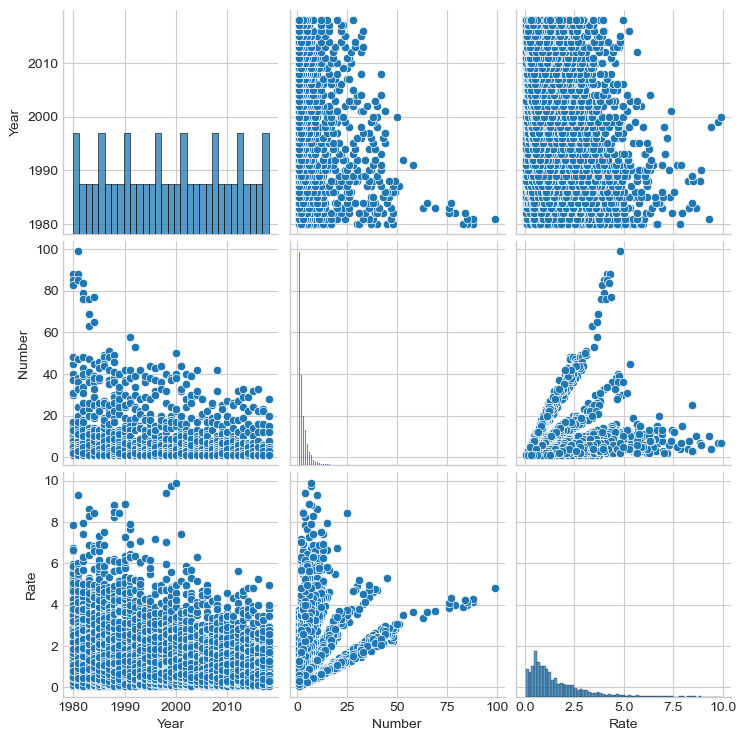

In [218]:
sns.pairplot(Mortality_rate)

# Checking missing values

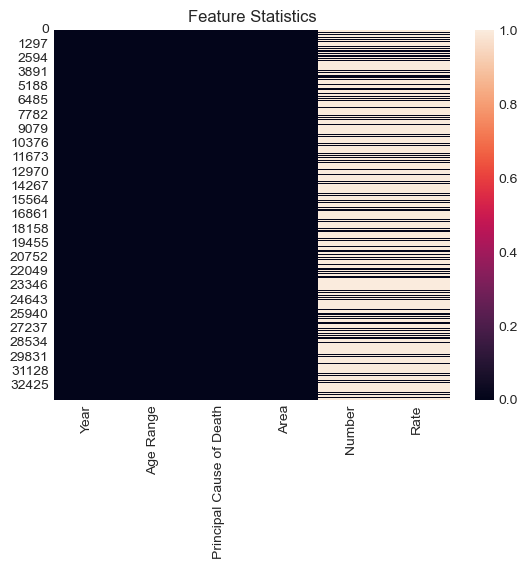

In [219]:
sns.heatmap(Mortality_rate.isnull())
plt.title("Feature Statistics")
plt.savefig("Mortality_rate", bbox_inches='tight', pad_inches=0.5)

In [220]:
#missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
#Child_mortality = pd.read_csv("Infant and Neonatal Mortality.csv", na_values = missing_value_formats,  dtype={'VALUE': float})

In [221]:
##Using interpolation to handle missing values
Mortality_rate['Number'].interpolate(method='linear', direction = 'forward', inplace=True) 
print(Mortality_rate['Number'].head(10)) 

0    NaN
1    5.0
2    3.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: Number, dtype: float64


In [222]:
##Using interpolation to handle missing values
Mortality_rate['Rate'].interpolate(method='linear', direction = 'forward', inplace=True) 
print(Mortality_rate['Rate'].head(10)) 

0      NaN
1    0.240
2    0.475
3    0.710
4    0.645
5    0.580
6    0.515
7    0.450
8    0.560
9    0.670
Name: Rate, dtype: float64


In [223]:
Mortality_rate.isnull().sum()

Year                        0
Age Range                   0
Principal Cause of Death    0
Area                        0
Number                      1
Rate                        1
dtype: int64

In [224]:
Mortality_rate = Mortality_rate.dropna()
Mortality_rate.count() 


Year                        33695
Age Range                   33695
Principal Cause of Death    33695
Area                        33695
Number                      33695
Rate                        33695
dtype: int64

In [225]:
Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,Number,Rate
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.240
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,3.0,0.475
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.710
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,1.0,0.645
5,1980,Infant (0-1 year),Infectious and parasitic diseases,Longford,1.0,0.580


In [226]:
Age_range= Mortality_rate['Age Range']
Age_range

1        Infant (0-1 year)
2        Infant (0-1 year)
3        Infant (0-1 year)
4        Infant (0-1 year)
5        Infant (0-1 year)
               ...        
33691    4 weeks to 1 year
33692    4 weeks to 1 year
33693    4 weeks to 1 year
33694    4 weeks to 1 year
33695    4 weeks to 1 year
Name: Age Range, Length: 33695, dtype: object

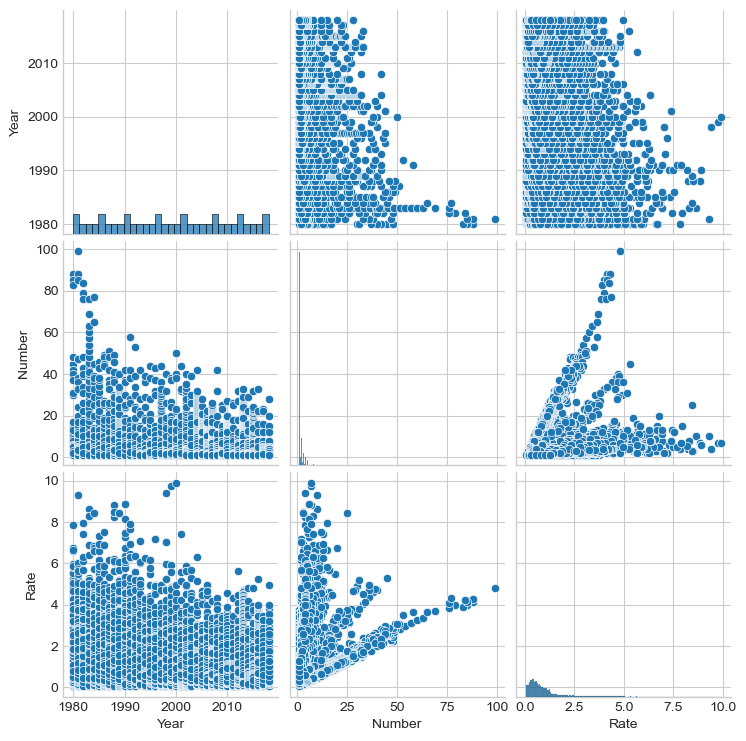

In [227]:
sns.pairplot(Mortality_rate)

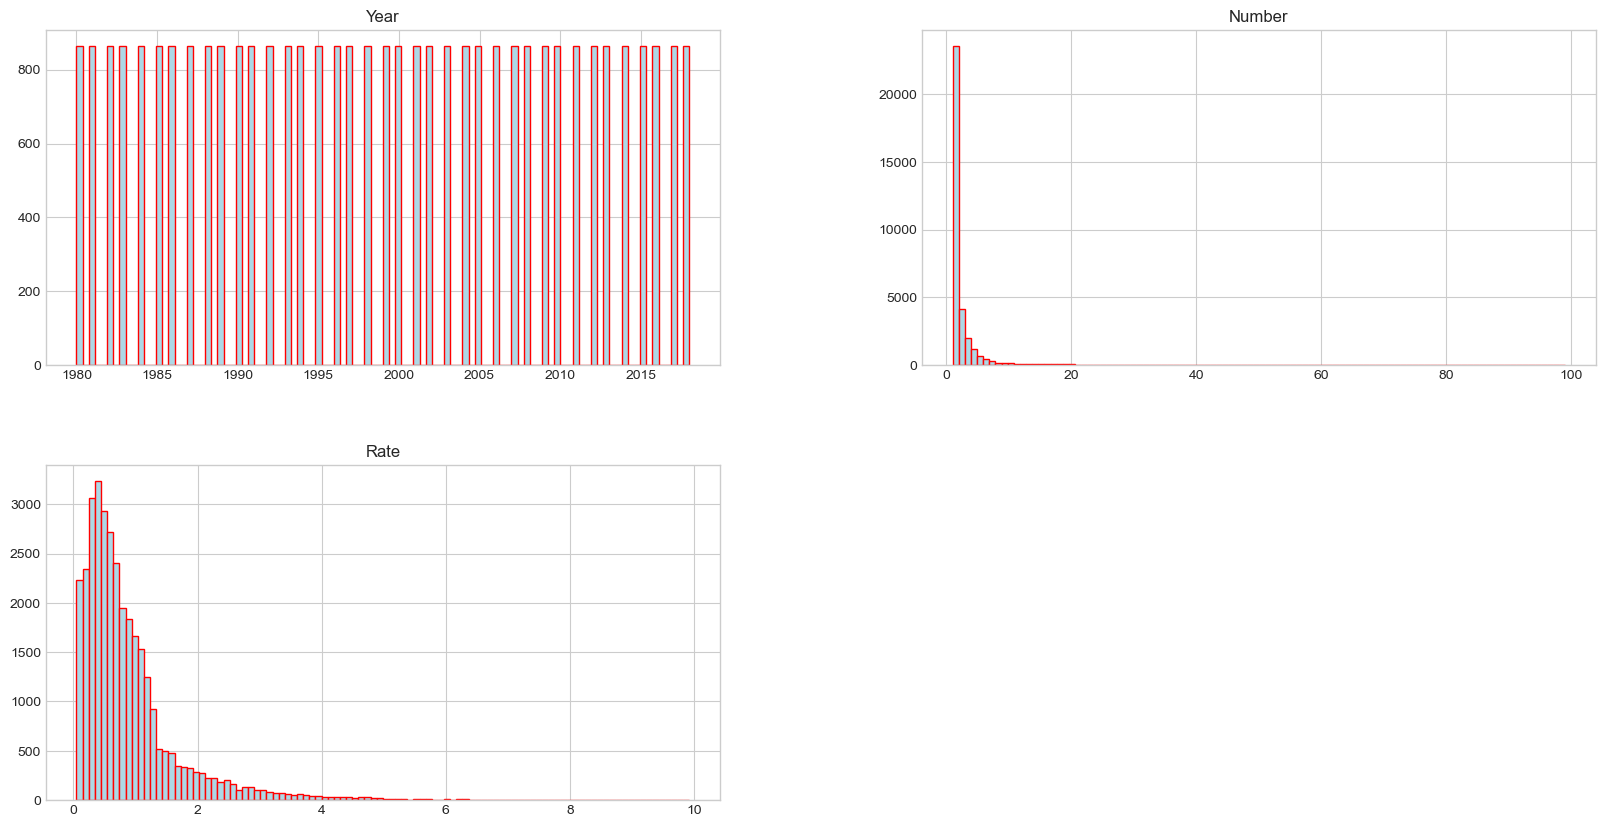

In [228]:
plt.style.use('seaborn-whitegrid')
Mortality_rate.hist(bins=100, figsize=(20,10), color='lightblue', edgecolor = 'red')
plt.show()

<Axes: xlabel='Year', ylabel='Number'>

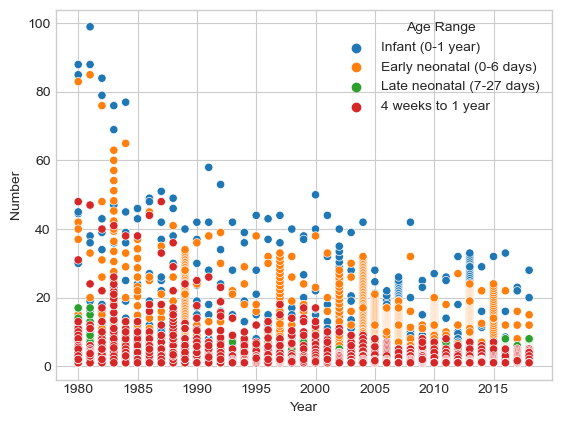

In [229]:
sns.scatterplot(data=Mortality_rate, x="Year", y="Number", hue="Age Range")

<Axes: xlabel='Year', ylabel='Rate'>

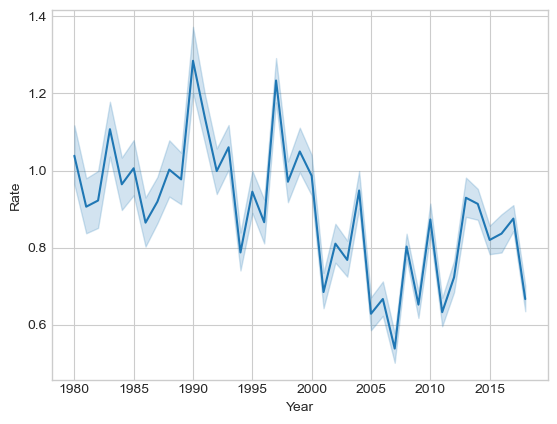

In [230]:
sns.lineplot(data=Mortality_rate, x="Year", y="Rate")

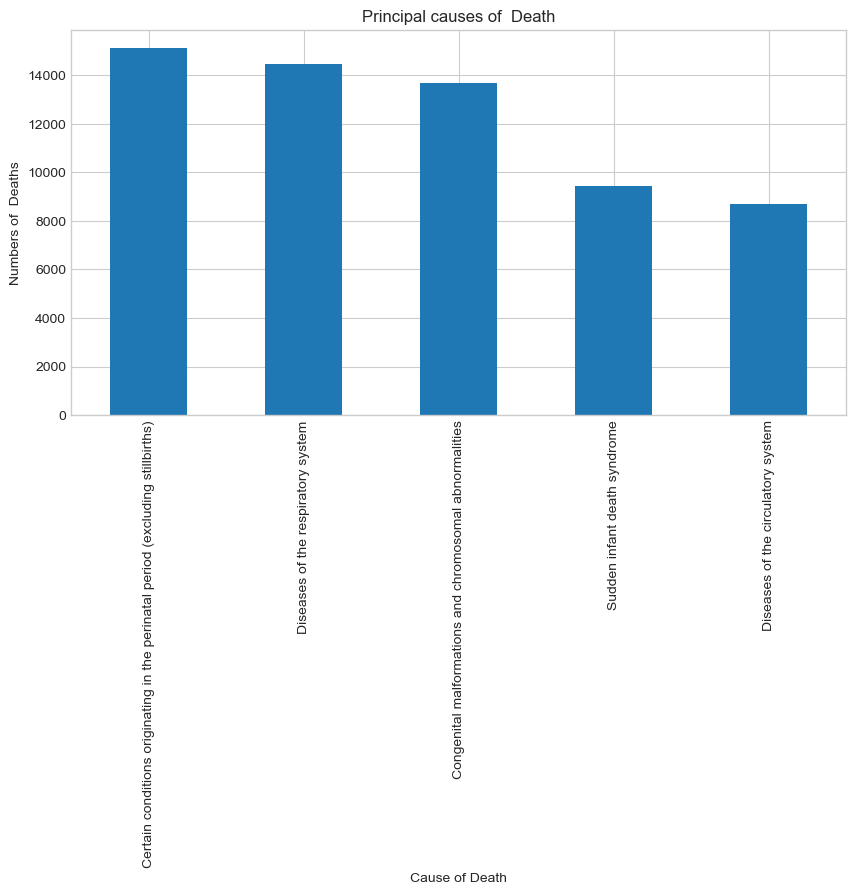

In [231]:
top_causes = Mortality_rate.groupby('Principal Cause of Death')['Number'].sum().nlargest()
# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
top_causes.plot(kind='bar')

# Personalizar el título y etiquetas
plt.title("Principal causes of  Death")
plt.ylabel("Numbers of  Deaths")
plt.xlabel("Cause of Death")

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

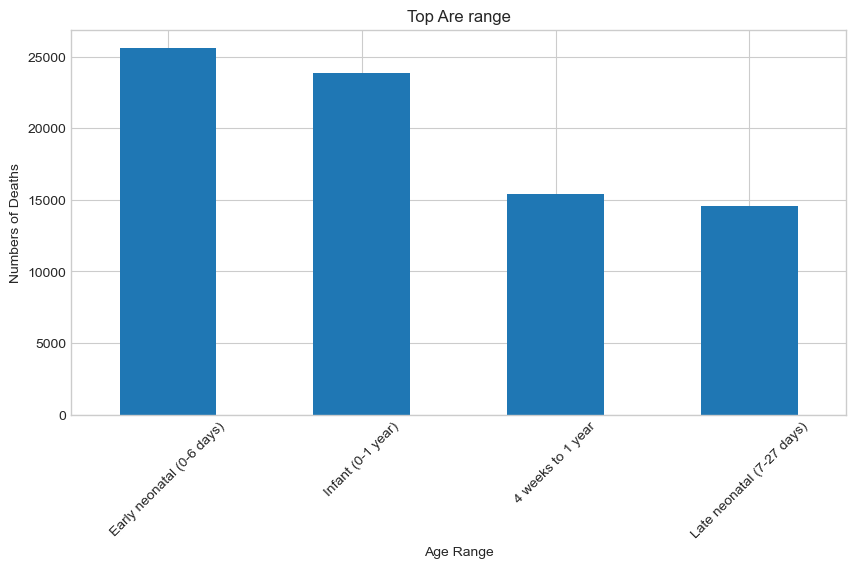

In [232]:
top_causes = Mortality_rate.groupby('Age Range')['Number'].sum().nlargest()
# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
top_causes.plot(kind='bar')

# Personalizar el título y etiquetas
plt.title("Top Are range")
plt.ylabel("Numbers of Deaths")
plt.xlabel("Age Range")

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

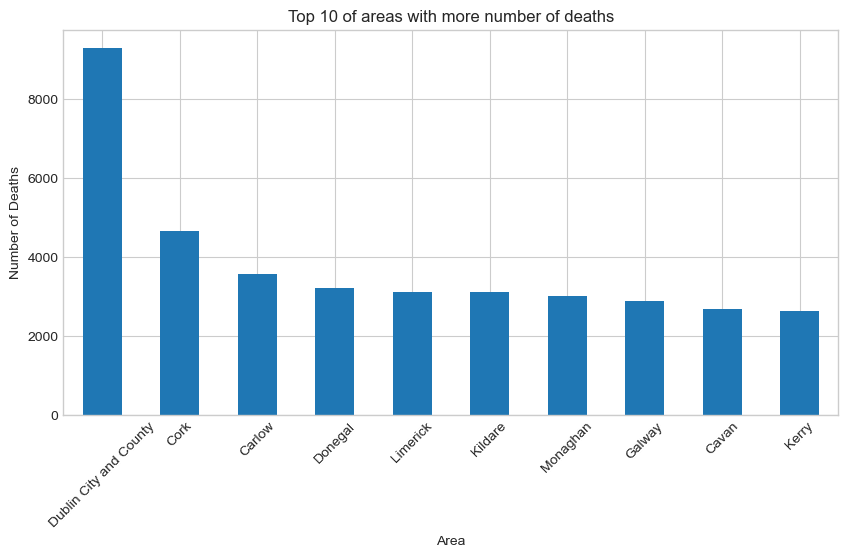

In [233]:
top_causes = Mortality_rate.groupby('Area')['Number'].sum().nlargest(10)
# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
top_causes.plot(kind='bar')

# Personalizar el título y etiquetas
plt.title("Top 10 of areas with more number of deaths")
plt.ylabel("Number of Deaths")
plt.xlabel("Area")

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

## Skewnes

In [234]:
print(Mortality_rate.Rate.skew())

2.846116582883751


In [235]:
print(Mortality_rate.Rate.kurt())

12.603164058373986


## Correlation

# Checking catecorical data

In [236]:
#rates_number =Mortality_rate.select_dtypes("Float64", "int64")
#print(rates_number)

In [237]:
Data_num = Mortality_rate[['Year','Number', 'Rate' ]]
Data_num

,Year,Number,Rate
1,1980,5.0,0.2400
2,1980,3.0,0.4750
3,1980,1.0,0.7100
4,1980,1.0,0.6450
5,1980,1.0,0.5800
...,...,...,...
33691,2018,1.0,1.0425
33692,2018,1.0,1.2900
33693,2018,1.0,1.2900
33694,2018,1.0,1.2900


In [238]:
Mortality_rate_objects =Mortality_rate.select_dtypes(object)
print(Mortality_rate_objects)

               Age Range           Principal Cause of Death  \
1      Infant (0-1 year)  Infectious and parasitic diseases   
2      Infant (0-1 year)  Infectious and parasitic diseases   
3      Infant (0-1 year)  Infectious and parasitic diseases   
4      Infant (0-1 year)  Infectious and parasitic diseases   
5      Infant (0-1 year)  Infectious and parasitic diseases   
...                  ...                                ...   
33691  4 weeks to 1 year       Sudden infant death syndrome   
33692  4 weeks to 1 year       Sudden infant death syndrome   
33693  4 weeks to 1 year       Sudden infant death syndrome   
33694  4 weeks to 1 year       Sudden infant death syndrome   
33695  4 weeks to 1 year       Sudden infant death syndrome   

                         Area  
1      Dublin City and County  
2                     Kildare  
3                    Kilkenny  
4                       Laois  
5                    Longford  
...                       ...  
33691              

In [239]:
#LABEL ENCONDING
from sklearn.preprocessing import LabelEncoder

In [240]:
le =LabelEncoder()

In [241]:
le.fit_transform(Mortality_rate_objects ["Area"])

array([ 5,  8,  9, ...,  1,  4, 17])

In [242]:
for col in Mortality_rate_objects:
    le =LabelEncoder()
    Mortality_rate_objects[col]=le.fit_transform(Mortality_rate_objects[col])
    

In [243]:
Mortality_rate_objects.head(10)

,Age Range,Principal Cause of Death,Area
1,2,5,5
2,2,5,8
3,2,5,9
4,2,5,10
5,2,5,13
6,2,5,14
7,2,5,16
8,2,5,19
9,2,5,24
10,2,5,25


In [244]:
Mortality_rate_objects

,Age Range,Principal Cause of Death,Area
1,2,5,5
2,2,5,8
3,2,5,9
4,2,5,10
5,2,5,13
...,...,...,...
33691,0,7,20
33692,0,7,21
33693,0,7,1
33694,0,7,4


In [245]:
Mortality_rate = pd.merge(Mortality_rate_objects, Data_num, left_index=True, right_index=True, suffixes=("_l", "_r"))
Mortality_rate.head()

,Age Range,Principal Cause of Death,Area,Year,Number,Rate
1,2,5,5,1980,5.0,0.240
2,2,5,8,1980,3.0,0.475
3,2,5,9,1980,1.0,0.710
4,2,5,10,1980,1.0,0.645
5,2,5,13,1980,1.0,0.580


In [246]:
Mortality_rate.shape

(33695, 6)

## Scaling

In [247]:
from sklearn.preprocessing import MinMaxScaler

In [248]:
min_max =MinMaxScaler()

In [249]:
Mortality_rate_minmax =pd.DataFrame(min_max.fit_transform(Mortality_rate), columns=Mortality_rate.columns )

In [250]:
Mortality_rate_minmax.head()

,Age Range,Principal Cause of Death,Area,Year,Number,Rate
0,0.666667,0.714286,0.192308,0.0,0.040816,0.019250
1,0.666667,0.714286,0.307692,0.0,0.020408,0.043060
2,0.666667,0.714286,0.346154,0.0,0.000000,0.066869
3,0.666667,0.714286,0.384615,0.0,0.000000,0.060284
4,0.666667,0.714286,0.500000,0.0,0.000000,0.053698


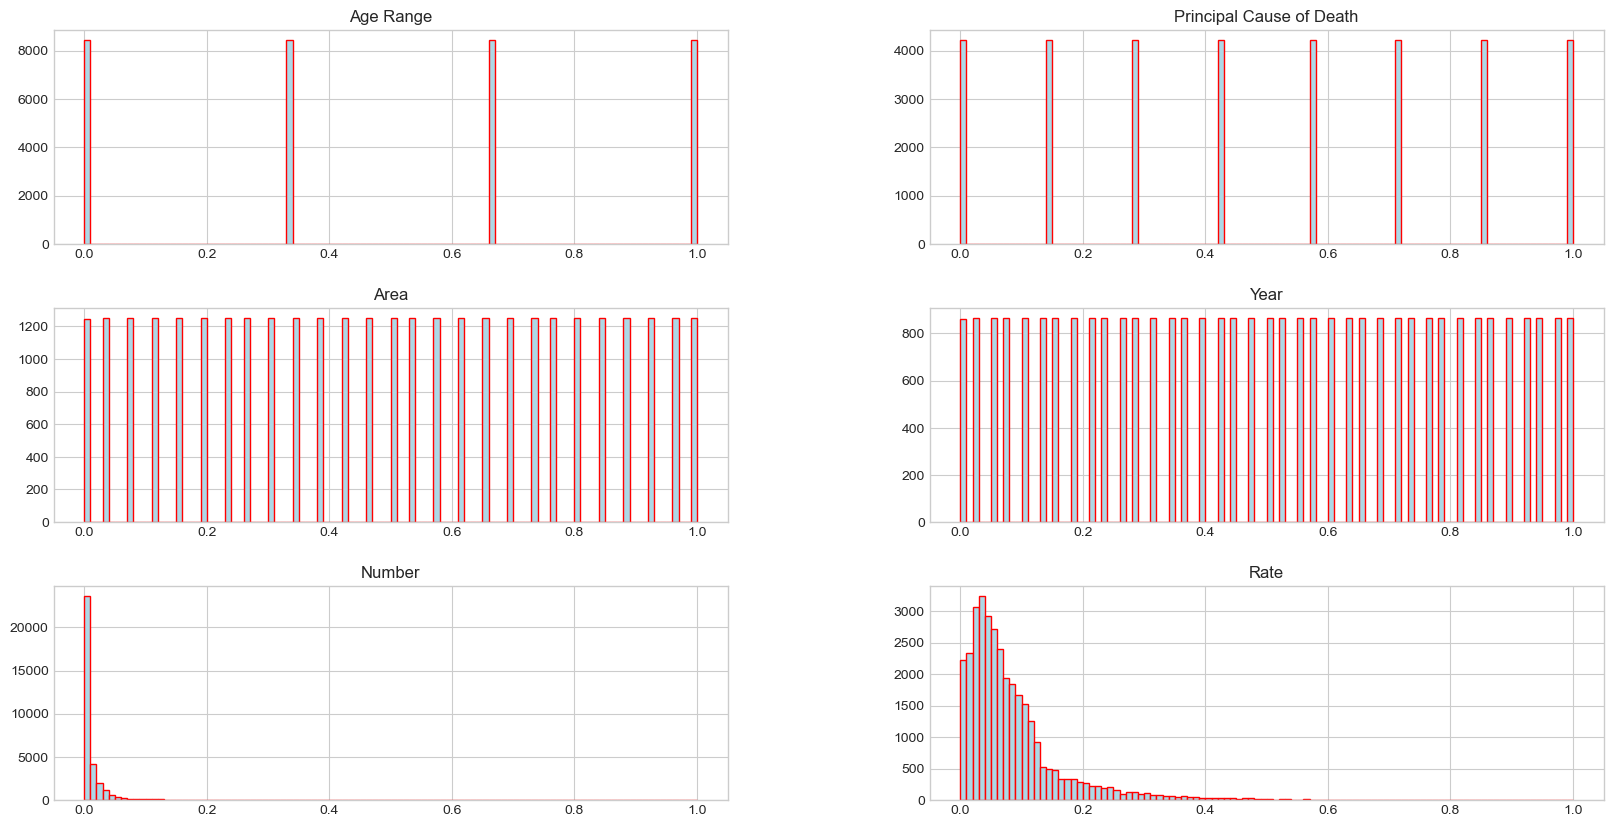

In [251]:
plt.style.use('seaborn-whitegrid')
Mortality_rate_minmax.hist(bins=100, figsize=(20,10), color='lightblue', edgecolor = 'red')
plt.show()

# Machine Learning

## KNN

In [252]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [253]:
X = Mortality_rate_minmax .drop(["Rate"], axis=1, ).values
y = Mortality_rate_minmax  ["Rate"].values

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [255]:
clf= KNeighborsRegressor(6)
clf.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [256]:
#model evaluation

In [257]:
y_predict=clf.predict(X_test)
print(mean_squared_error(y_test, y_predict))

0.0035484194608903855


In [258]:
neighbors = np.arange(1, 10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


In [259]:
# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.0035484194608903855
R-squared (R2) Score: 0.5215575858755946


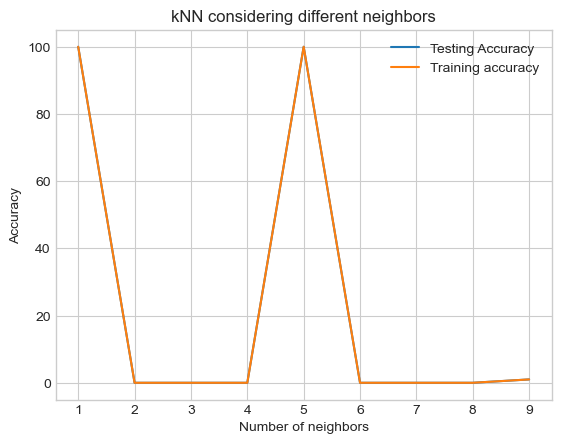

In [260]:
plt.title('kNN considering different neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [277]:
Mortality_rate.head()

,Age Range,Principal Cause of Death,Area,Year,Number,Rate
1,2,5,5,1980-01-01,5.0,0.240
2,2,5,8,1980-01-01,3.0,0.475
3,2,5,9,1980-01-01,1.0,0.710
4,2,5,10,1980-01-01,1.0,0.645
5,2,5,13,1980-01-01,1.0,0.580


# Times series 

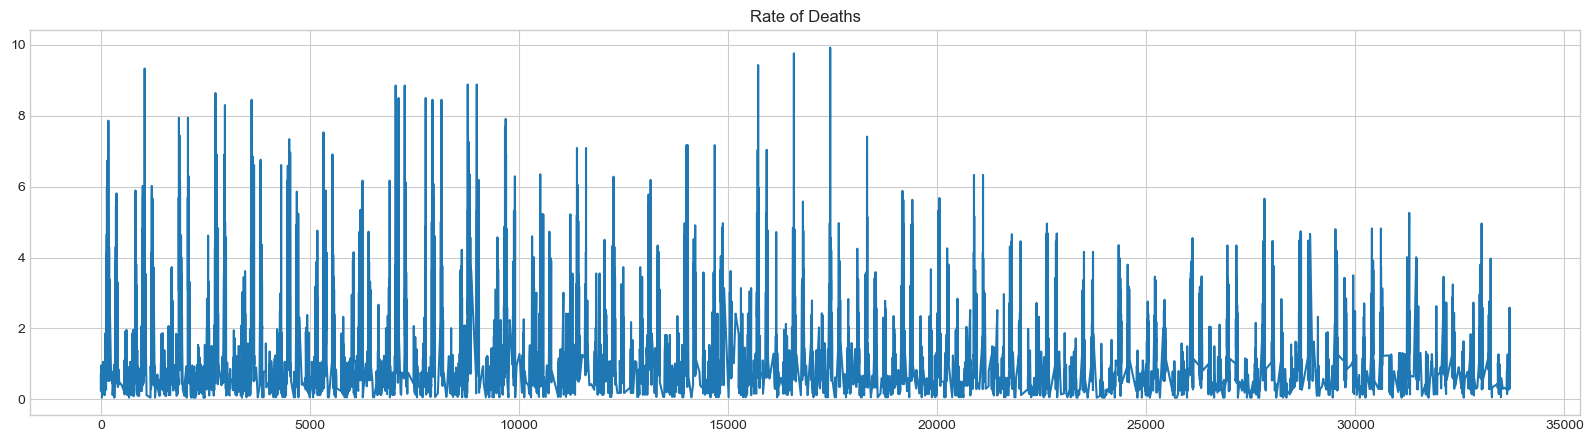

In [263]:

Mortality_rate['Rate'].plot(figsize=(20,5), title ="Rate of Deaths")
plt.show()

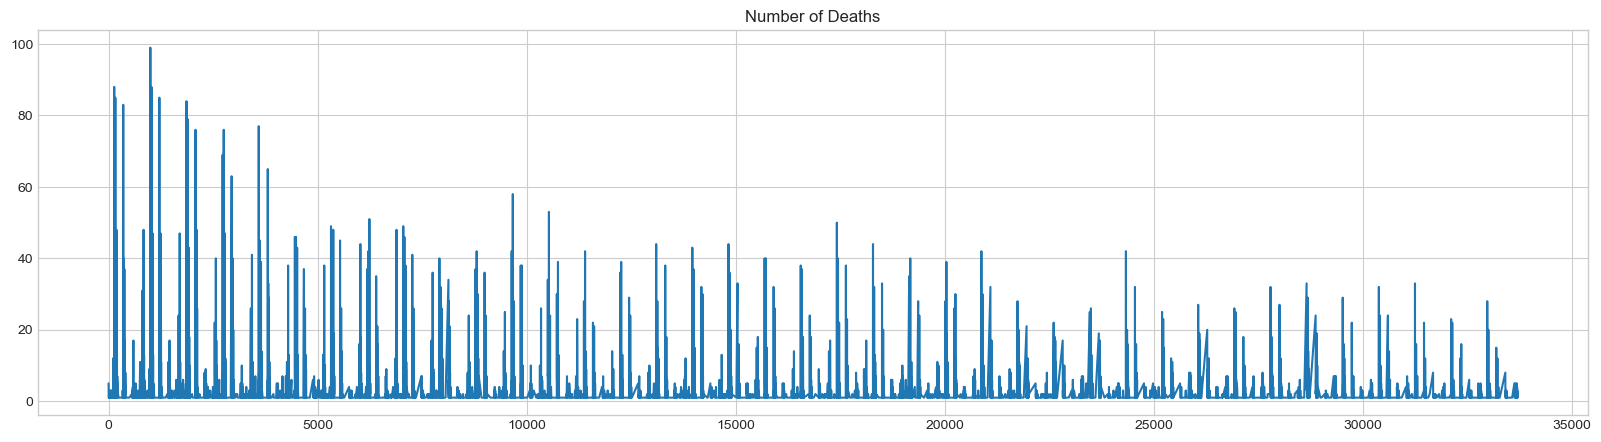

In [264]:
Mortality_rate['Number'].plot(figsize=(20,5), title ="Number of Deaths")
plt.show()

Text(0.5, 1.0, 'Rate vr Number ')

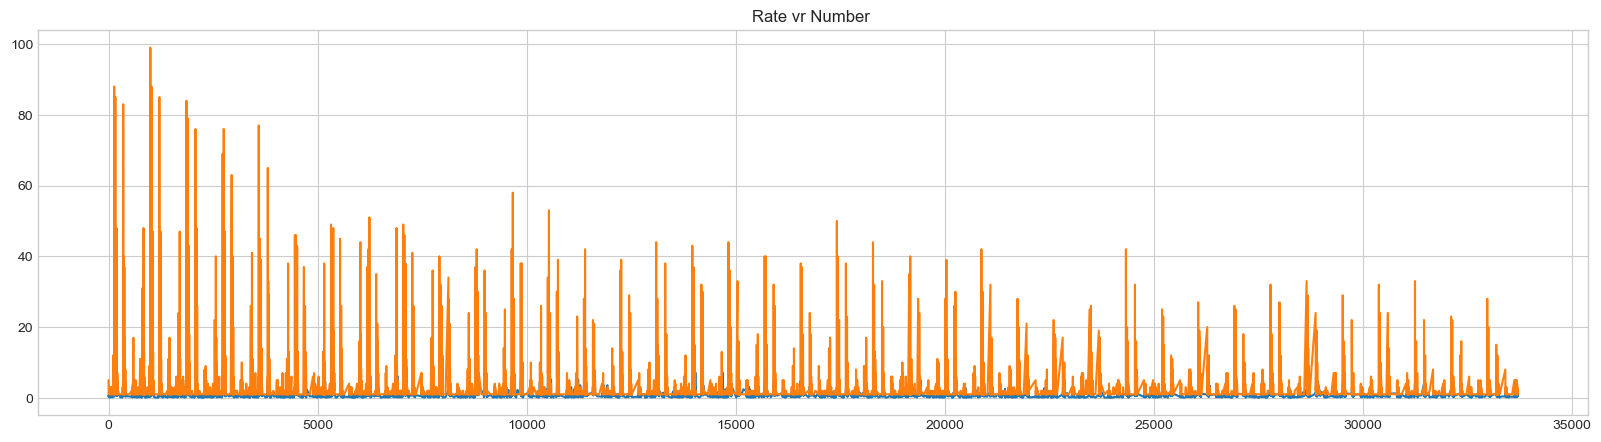

In [265]:
Mortality_rate['Rate'].plot(figsize=(20,5), title ="Rate of Deaths")
Mortality_rate['Number'].plot(figsize=(20,5), title ="Number of Deaths")
plt.title("Rate vr Number ")

# qq plot

In [266]:
import scipy.stats
import pylab

<function matplotlib.pyplot.show(close=None, block=None)>

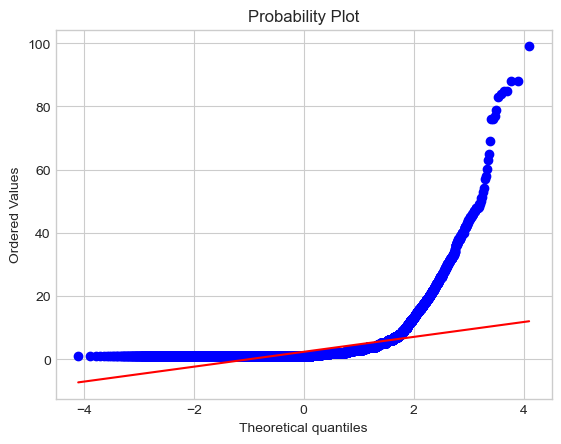

In [267]:

scipy.stats.probplot(Mortality_rate['Number'], plot=pylab)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

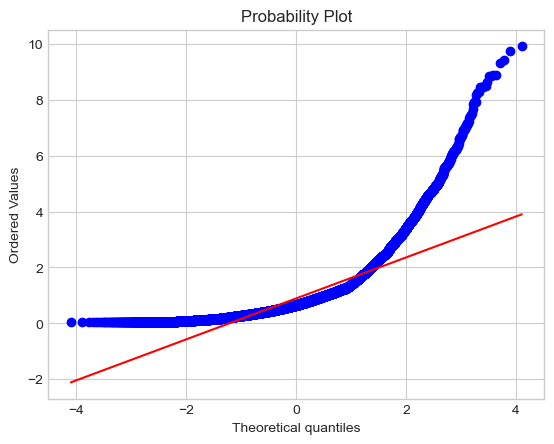

In [268]:
scipy.stats.probplot(Mortality_rate['Rate'], plot=pylab)
plt.show

# Length of the time

NameError: name 'Check' is not defined

In [270]:
Mortality_rate['Year'] = pd.to_datetime(Mortality_rate['Year'], format='%Y')  # Asegura que la columna 'Year' sea de tipo datetime
Year = Mortality_rate['Year']  # Crea una variable 'Year' para la columna 'Year'
print(Year.describe()) 

count                            33695
mean     1999-01-01 08:01:12.651728640
min                1980-01-01 00:00:00
25%                1989-01-01 00:00:00
50%                1999-01-01 00:00:00
75%                2009-01-01 00:00:00
max                2018-01-01 00:00:00
Name: Year, dtype: object


Text(0.5, 1.0, 'Rate vr Number ')

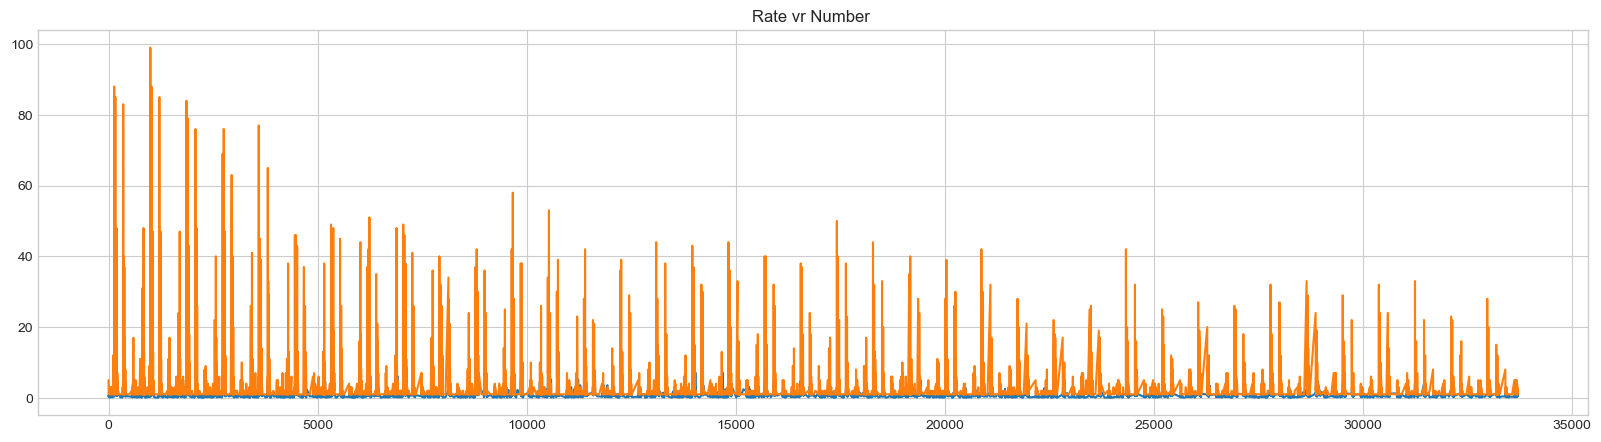

Text(0, 0.5, 'Rate of Deaths')

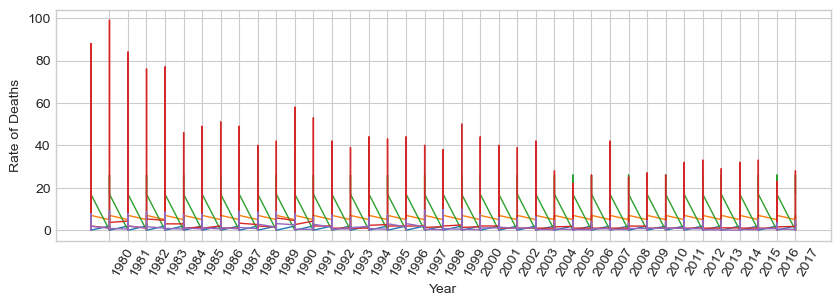

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the size of the data set
plt.figure(figsize = (10, 3))

# Arrange the data set using date_range() method
xticks = pd.date_range(start = Mortality_rate.index.min(), end = Mortality_rate.index.max(), freq = 'Y')

# Set the date format for the plot
plt.xticks(xticks, xticks.strftime('%Y'), rotation = 60, ha = "left")
# plt.xticks(xticks, xticks.strftime("%d-%m-%d"), rotation = 90, ha = "left")

plt.plot(Mortality_rate, linewidth = 1)
plt.xlabel("Year")
plt.ylabel("Rate of Deaths")

## Random forest Regression

In [62]:
# Declaration of Varaibles
X = Mortality_rate_minmax.drop(["Rate"], axis=1, )
y = Mortality_rate_minmax["Rate"]              # Store last column into an array (y)

# Use train_test_split method to split the data into 40% and 60%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [63]:
# import RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor

# Create an object forest by calling a method RandomForestRegressor()
forest = RandomForestRegressor(n_estimators = 1000, 
                               criterion='squared_error',  # Change 'mse' to 'squared_error'
                               random_state = 1, 
                               n_jobs = -1)

# Train the Model by calling a fit() method
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Display the r2 score values
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

R^2 train: 0.979, test: 0.832


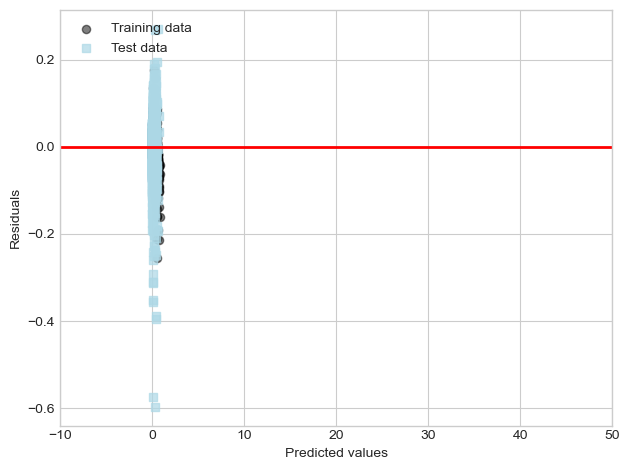

In [64]:
# Draw a scatter plot
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c = 'black', 
            marker = 'o', 
            s = 35,
            alpha = 0.5,
            label = 'Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c = 'lightblue', 
            marker = 's', 
            s = 35,
            alpha = 0.7,
            label = 'Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('./figures/slr_residuals.png', dpi=300)
plt.show()

### Cross validation

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Crear un objeto RandomForestRegressor con tus hiperparámetros
forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error', random_state=1, n_jobs=-1)

# Realizar validación cruzada en el conjunto de entrenamiento
cv_scores = cross_val_score(forest, X_train, y_train, cv=5)  # Aquí cv=5 indica 5-fold cross-validation

# Imprimir los resultados de la validación cruzada
print('Resultados de la validación cruzada:')
print('R^2 medio: %.3f' % np.mean(cv_scores))
print('Desviación estándar: %.3f' % np.std(cv_scores))

Resultados de la validación cruzada:
R^2 medio: 0.825
Desviación estándar: 0.019


In [ ]:
#cross_val_score(cross_val_score(forest, X_train, y_train, scoring='accuracy', cv=30).mean())

# Data visualization

In [ ]:
sns.barplot(x="Age Range", y="Number", data=Mortality_rate)
plt.xticks(rotation=45)  # Rotate x-axis labels

# Show the first plot
plt.show()

# Create a barplot for 'Rate' column
sns.barplot(x="Age Range", y="Rate", data=Mortality_rate)
plt.xticks(rotation=45)  # Rotate x-axis labels

# Show the second plot
plt.show()

In [ ]:
sns.lineplot(data=Mortality_rate, x="Year", y="Number", hue="Age Range")

In [ ]:
sns.lineplot(data=Mortality_rate, x="Year", y="Rate", hue="Age Range", errorbar=None)

In [ ]:
sns.lineplot(data=Mortality_rate, x="Area", y="Number", hue="Age Range")
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.lineplot(data=Mortality_rate, x="Area", y="Rate", hue="Age Range")
plt.xticks(rotation=90)
plt.show()